# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----

## Imports and Data

**TASK: Run the following cells to import libraries and read in data.**

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis

**TASK: Explore the rows and columns of the data as well as the data types of the columns.**

In [241]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

**TASK: Create a histogram of the Population column.**

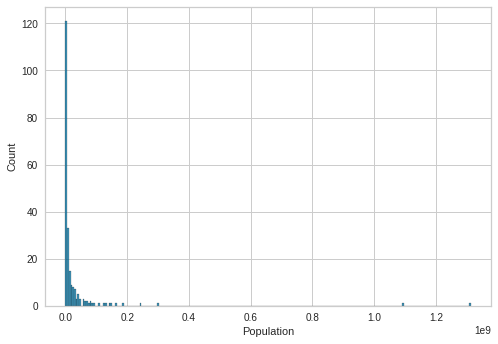

In [243]:
sns.histplot(data=df, x='Population')
plt.show()

**TASK: You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

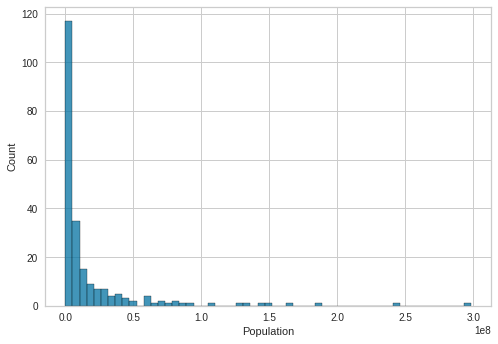

In [244]:
sns.histplot(data=df[df['Population'] < 0.5e9], x='Population')

**TASK: Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

**TASK: Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

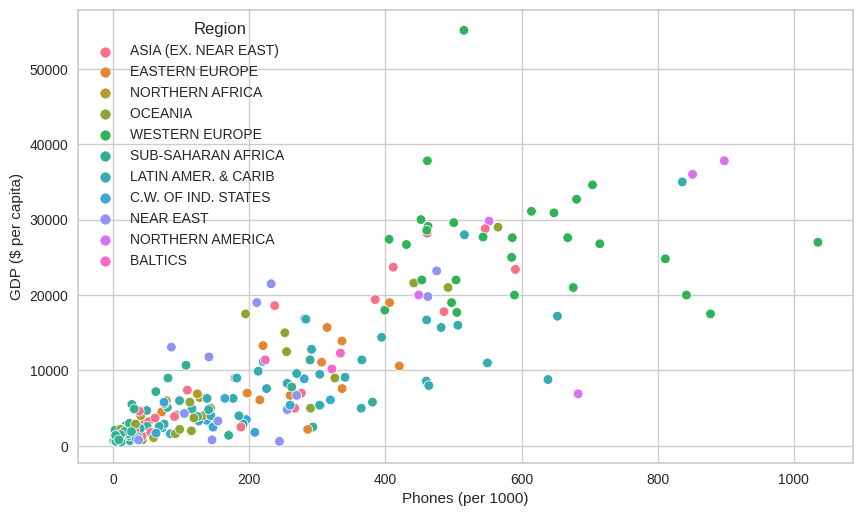

In [245]:
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=df, x='Phones (per 1000)', y='GDP ($ per capita)', hue='Region')

**TASK: Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

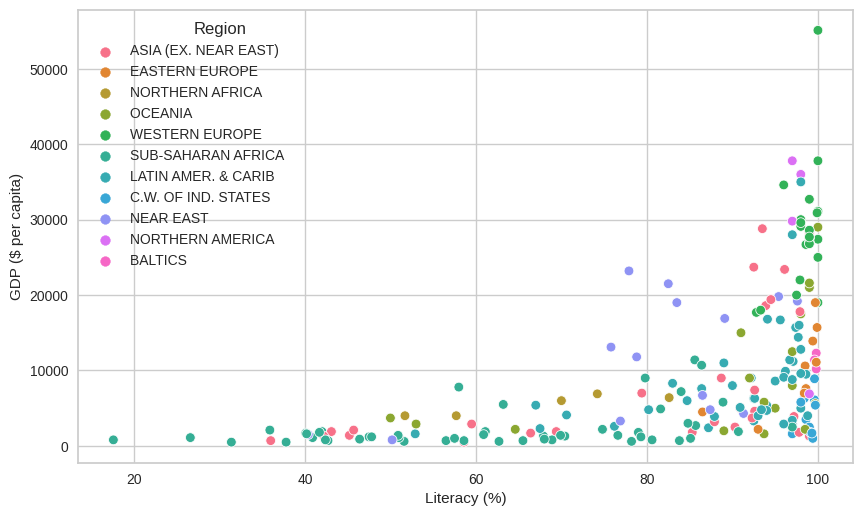

In [246]:
plt.figure(figsize=(10, 6), dpi=100)
sns.scatterplot(data=df, y='GDP ($ per capita)', x='Literacy (%)', hue='Region')

**TASK: Create a Heatmap of the Correlation between columns in the DataFrame.**

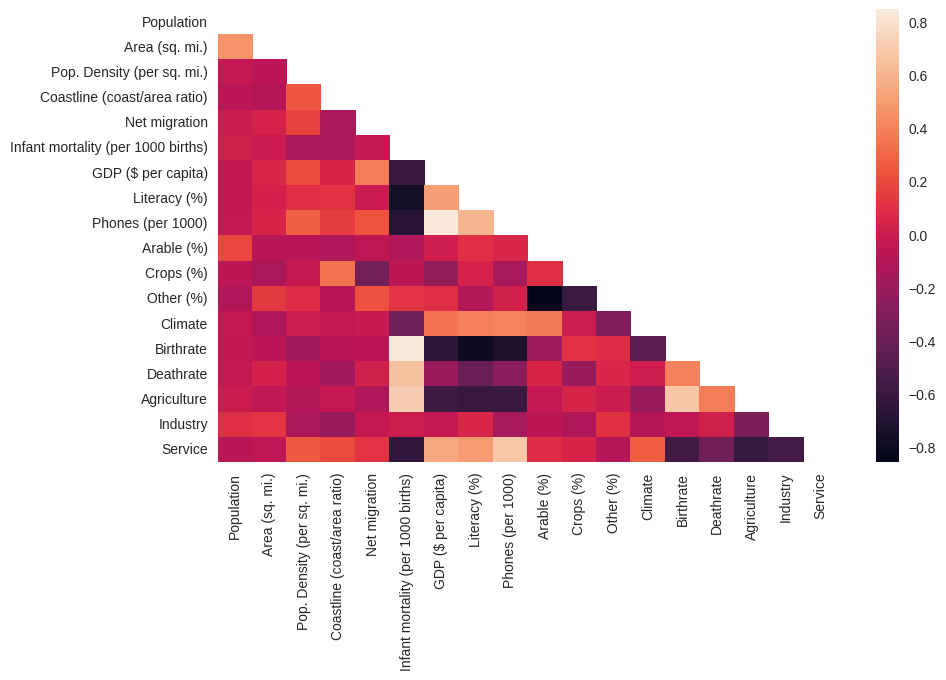

In [247]:
plt.figure(figsize=(10, 6), dpi=100)

sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=bool)))

**TASK: Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.**

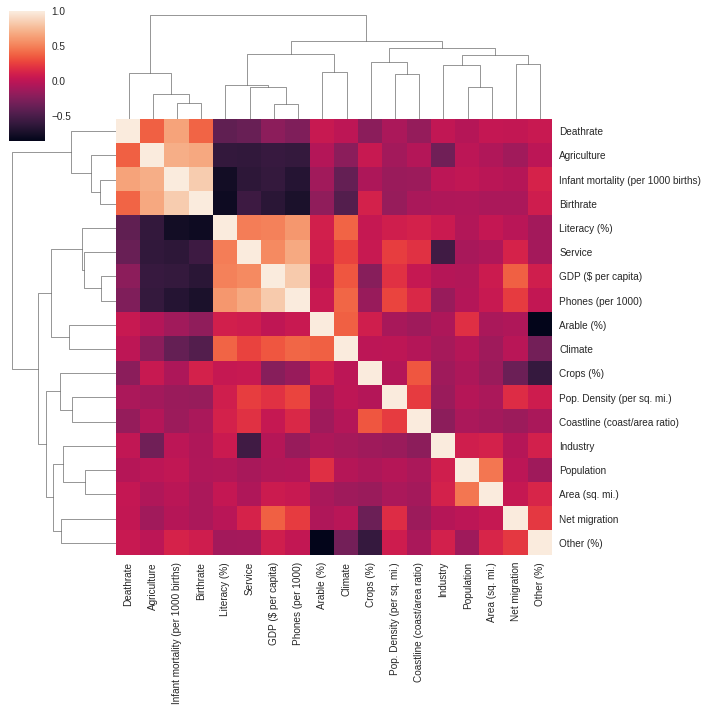

In [248]:
sns.clustermap(df.corr())

-----

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

**TASK: Report the number of missing elements per column.**

In [249]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [250]:
df[df['Agriculture'].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,NaN,448.9,0.00,0.00,100.00,1.0,15.93,7.84,NaN,NaN,NaN
83,Guam,OCEANIA,171019,541,316.1,23.20,0.00,6.94,21000.0,99.0,492.0,9.09,16.36,74.55,2.0,18.79,4.48,NaN,NaN,NaN
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,538.1,49.52,6.78,62.40,2600.0,NaN,49.7,NaN,NaN,NaN,2.0,40.95,7.70,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN
144,Nauru,OCEANIA,13287,21,632.7,142.86,0.00,9.95,5000.0,NaN,143.0,0.00,0.00,100.00,2.0,24.76,6.70,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.0,254.7,13.04,4.35,82.61,2.0,19.43,2.29,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413,18.2,14.53,0.00,19.00,2500.0,97.0,293.3,12.90,0.00,87.10,NaN,12.13,6.53,NaN,NaN,NaN


**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for. For a hint on how to do this, recall you can do the following:**
    

In [251]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

**TASK: Now check to see what is still missing by counting number of missing elements again per feature:**

In [252]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [253]:
df.groupby('Region')['Climate'].transform('mean')

0      1.962963
1      3.111111
2      1.500000
3      2.000000
4      2.826087
         ...   
222    1.666667
223    1.500000
224    1.666667
225    1.846939
226    1.846939
Name: Climate, Length: 227, dtype: float64

In [254]:
df['Climate']

0      1.0
1      3.0
2      1.0
3      2.0
4      3.0
      ... 
222    3.0
223    1.0
224    1.0
225    2.0
226    2.0
Name: Climate, Length: 227, dtype: float64

In [255]:
df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'), inplace=True)

**TASK: Check again on many elements are missing:**

In [256]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [257]:
df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'), inplace=True)

**TASK: Check again on the remaining missing values:**

In [258]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**TASK: Optional: We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [259]:
df.dropna(inplace=True)

## Data Feature Preparation

**TASK: It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [260]:
X = df.drop('Country', axis=1)

**TASK: Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [261]:
X = pd.get_dummies(X, drop_first=True)

### Scaling

**TASK: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [262]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Creating and Fitting Kmeans Model

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.**

/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



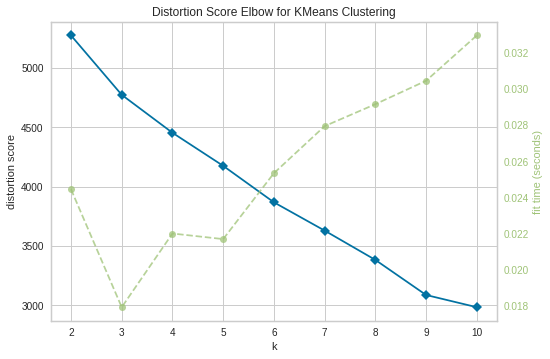

In [263]:
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans

kelbow = KElbowVisualizer(KMeans())
kelbow.fit(X)
kelbow.show()

-----


#### Example Interpretation: Choosing K=3

**One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!**

In [264]:
kmeans = KMeans(3, random_state=0)

clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters

In [265]:
df[['Country', 'Cluster']].head()

,Country,Cluster
0,Afghanistan,0
1,Albania,2
2,Algeria,2
3,American Samoa,2
4,Andorra,1


------------
-------------

# BONUS CHALLGENGE:
## Geographical Model Interpretation

The best way to interpret this model is through visualizing the clusters of countries on a map! **NOTE: THIS IS A BONUS SECTION.  YOU MAY WANT TO JUMP TO THE SOLUTIONS LECTURE FOR A FULL GUIDE, SINCE WE WILL COVER TOPICS NOT PREVIOUSLY DISCUSSED AND BE HAVING A NUANCED DISCUSSION ON PERFORMANCE!**

----
----

**IF YOU GET STUCK, PLEASE CHECK OUT THE SOLUTIONS LECTURE. AS THIS IS OPTIONAL AND COVERS MANY TOPICS NOT SHOWN IN ANY PREVIOUS LECTURE**

----
----

**TASK: Let's put you in the real world! Your boss just asked you to plot out these clusters on a country level choropleth map, can you figure out how to do this? We won't step by step guide you at all on this, just show you an example result. You'll need to do the following:**

1. Figure out how to install plotly library: https://plotly.com/python/getting-started/

2. Figure out how to create a geographical choropleth map using plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. You will need ISO Codes for this. Either use the wikipedia page, or use our provided file for this: **"../DATA/country_iso_codes.csv"**

4. Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with plotly given what you learned in Step 1 and Step 2.


**Note: This is meant to be a more realistic project, where you have a clear objective of what you need to create and accomplish and the necessary online documentation. It's up to you to piece everything together to figure it out! If you get stuck, no worries! Check out the solution lecture.**



In [266]:
#!pip install plotly

In [267]:
iso_codes = pd.read_csv('country_iso_codes.csv')

In [268]:
df = pd.merge(left=df , right=iso_codes, on='Country', how='left')

In [269]:
import plotly.express as px


fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country")
fig.show()

---